## Evaluating Techniques
### Classification Model

#### Nomor 1

In [34]:
from sklearn import datasets, metrics
import matplotlib.pyplot as plt

%matplotlib inline

In [35]:
digits = datasets.load_digits()

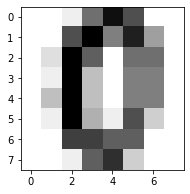

In [36]:
plt.figure(figsize=(3,3))
plt.imshow(digits.images[10], cmap=plt.cm.gray_r)

#### Nomor 2

In [37]:
digits.images[10]

array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8., 14.,  6.,  0.],
       [ 0.,  2., 16., 10.,  0.,  9.,  9.,  0.],
       [ 0.,  1., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  1., 16.,  5.,  1., 11.,  3.,  0.],
       [ 0.,  0., 12., 12., 10., 10.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13.,  3.,  0.,  0.]])

In [38]:
digits.data[10]

array([ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.,  0.,  0., 11., 16.,  8.,
       14.,  6.,  0.,  0.,  2., 16., 10.,  0.,  9.,  9.,  0.,  0.,  1.,
       16.,  4.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  8.,
        0.,  0.,  1., 16.,  5.,  1., 11.,  3.,  0.,  0.,  0., 12., 12.,
       10., 10.,  0.,  0.,  0.,  0.,  1., 10., 13.,  3.,  0.,  0.])

In [39]:
digits.target[10]

0

#### Nomor 3

In [40]:
X_digits = digits.data
y_digits = digits.target

num_data_points = len(X_digits)
X_train = X_digits[:int(.7*num_data_points)]
y_train = y_digits[:int(.7*num_data_points)]
X_test = X_digits[:int(.7*num_data_points)]
y_test = y_digits[:int(.7*num_data_points)]
print(X_train.shape, X_test.shape)

(1257, 64) (1257, 64)


#### Nomor 4

In [67]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
logistic.fit(X_train,y_train)

C:\Users\USer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Nomor 5

In [68]:
print('Logistic Regression mean Accuracy : %f' %logistic.score(X_test,y_test))

Logistic Regression mean Accuracy : 0.970760


### Evaluating The Clustering
#### Nomor 6

In [43]:
#Using Wisconsin Breast Cancer dataset
import numpy as np
from sklearn.datasets import load_breast_cancer

#load data
data = load_breast_cancer()
X = data.data
y = data.target
print(X.shape, data.feature_names)


(569, 30) ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### Partitioning Based Clustering
#### Nomor 7

In [44]:
#Unsupervised learning-partitioning
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=2)
km.fit(X)

labels = km.labels_
centers = km.cluster_centers_
print(labels[:10])

[1 1 1 0 1 0 1 0 0 0]


#### Nomor 8

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
bc_pca = pca.fit_transform(X)

#### Nomor 9

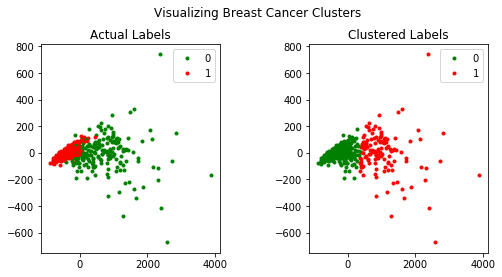

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Visualizing Breast Cancer Clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Actual Labels')
ax2.set_title('Clustered Labels')

for i in range(len(y)):
    if y[i] == 0:
        c1 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if y[i] == 1:
        c2 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
        
    if labels[i] == 0:
        c3 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if labels[i] == 1:
        c4 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
        
l1 = ax1.legend([c1, c2], ['0', '1'])
l2 = ax2.legend([c3, c4], ['0', '1'])

### Hierarchical Clustering
#### Nomor 10

In [47]:
#Unsupervised Learning - Hierarchical

from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
np.set_printoptions(suppress = True)

Z = linkage(X, 'ward')
print(Z)

[[  287.           336.             3.81596727     2.        ]
 [  106.           420.             4.11664267     2.        ]
 [   55.           251.             4.93361024     2.        ]
 ...
 [ 1130.          1132.          6196.07482529    86.        ]
 [ 1131.          1133.          8368.99225244   483.        ]
 [ 1134.          1135.         18371.10293626   569.        ]]


#### Nomor 11

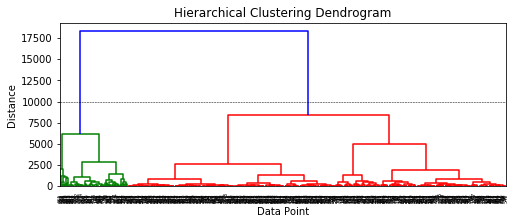

In [48]:
plt.figure(figsize=(8,3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=10000, c='k', ls='--', lw=0.5)
plt.show()

#### Nomor 12

In [49]:
from scipy.cluster.hierarchy import fcluster
max_dist = 10000
hc_labels = fcluster(Z, max_dist, criterion='distance')

#### Nomor 13

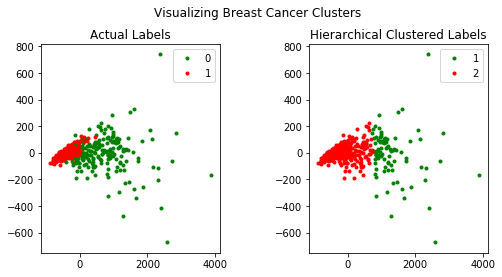

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Visualizing Breast Cancer Clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Actual Labels')
ax2.set_title('Hierarchical Clustered Labels')

for i in range(len(y)):
    if y[i] == 0:
        c1 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if y[i] == 1:
        c2 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
        
    if hc_labels[i] == 1:
        c3 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if hc_labels[i] == 2:
        c4 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
        
l1 = ax1.legend([c1, c2], ['0', '1'])
l2 = ax2.legend([c3, c4], ['1', '2'])

### Model Evaluation
### Evaluating Classification Models
#### Nomor 14

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(398, 30) (171, 30)


### Confusion Matrix
#### Nomor 15

In [52]:
from sklearn import linear_model

logistic=linear_model.LogisticRegression()
logistic.fit(X_train, y_train)

C:\Users\USer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Nomor 16

In [53]:
#Confusion Matrix
import model_evaluation_utils as meu

y_pred = logistic.predict(X_test)
meu.display_confusion_matrix(true_labels=y_test, predicted_labels=y_pred,
                            classes=[0,1])

          Predicted:     
                   0    1
Actual: 0         59    4
        1          1  107


C:\Users\USer\Machine Learning\Untitled Folder\model_evaluation_utils.py:61: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels),
C:\Users\USer\Machine Learning\Untitled Folder\model_evaluation_utils.py:63: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels))


In [54]:
possitive_class = 1
TP = 106
FP = 4
TN = 9
FN = 2

### Evaluating Classification Models
#### Nomor 17

In [55]:
fw_acc = round(meu.metrics.accuracy_score(y_true=y_test, y_pred=y_pred), 5)
mc_acc = round((TP + TN) / (TP + TN + FP + FN), 5)
print('Framework Accuracy:', fw_acc)
print('Manually Computed Accuracy:', mc_acc)

Framework Accuracy: 0.97076
Manually Computed Accuracy: 0.95041


#### Nomor 18

In [56]:
fw_prec = round(meu.metrics.precision_score(y_true=y_test, y_pred=y_pred), 5)
mc_prec = round((TP) / (TP + FP), 5)
print('Framework Precision: ', fw_prec)
print('Manually Computed Precision:', mc_prec)

Framework Precision:  0.96396
Manually Computed Precision: 0.96364


#### Nomor 19

In [57]:
fw_rec = round(meu.metrics.recall_score(y_true=y_test, y_pred=y_pred), 5)
mc_rec = round((TP) / (TP + FN), 5)
print('Framework Recall:', fw_rec)
print('Manually Computed Recall:', mc_rec)

Framework Recall: 0.99074
Manually Computed Recall: 0.98148


#### Nomor 20

In [58]:
fw_f1 = round(meu.metrics.f1_score(y_true=y_test, y_pred=y_pred),5)
mc_f1 = round((2*mc_prec*mc_rec) / (mc_prec+mc_rec),5)
print('Framework F1-Score:', fw_f1)
print('Manually Computed F1-Score:', mc_f1)

Framework F1-Score: 0.97717
Manually Computed F1-Score: 0.97248


#### Nomor 21

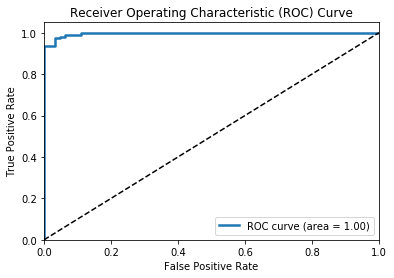

In [59]:
meu.plot_model_roc_curve(clf=logistic, features=X_test, true_labels=y_test)

### Evaluating Clustering Models
#### Nomor 22

In [60]:
km2 = KMeans(n_clusters=2, random_state=42).fit(X)
km2_labels = km2.labels_

km5 = KMeans(n_clusters=5, random_state=42).fit(X)
km5_labels = km5.labels_

### External Validation 
#### Nomor 23

In [61]:
km2_hcv = np.round(metrics.homogeneity_completeness_v_measure(y, km2_labels), 3)
km5_hcv = np.round(metrics.homogeneity_completeness_v_measure(y, km5_labels), 3)

print('Homogeneity, Completeness, V-measure metrics for num clusters=2: ', km2_hcv)
print('Homogeneity, Completeness, V-measure metrics for num clusters=5: ', km5_hcv)

Homogeneity, Completeness, V-measure metrics for num clusters=2:  [0.422 0.517 0.465]
Homogeneity, Completeness, V-measure metrics for num clusters=5:  [0.602 0.299 0.399]


### Internal Validation
#### Nomor 24

In [62]:
from sklearn import metrics

km2_silc = metrics.silhouette_score(X, km2_labels, metric='euclidean')
km5_silc = metrics.silhouette_score(X, km5_labels, metric='euclidean')

print('Silhouette Coefficient for num clusters=2: ', km2_silc)
print('Silhouette Coefficient for num clusters=5: ', km5_silc)

Silhouette Coefficient for num clusters=2:  0.6972646156059464
Silhouette Coefficient for num clusters=5:  0.5120588504057626
